### Imports

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

In [2]:
def load_data(directory):
    data = pd.read_csv(directory,header=None).values
    X = data[:,0].reshape(-1,1)
    Y = data[:,1].reshape(-1,1)
    return X,Y

def log_scale(Y):
    return np.log(Y)

def normalizer(X,Y,cast=True,normal=True):
    mx = X.mean()
    my = Y.mean()
    sx = X.std()
    sy = Y.std()
    if normal:
        X = (X-mx)/sx
        Y = (Y-my)/sy
    if cast:
        X = X.astype(np.float32)
        Y = Y.astype(np.float32)
        
    return X,Y,mx,my,sx,sy

def create_model(X,Y,n_epochs,lr=0.01):
    model = nn.Linear(1,1)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(),lr=lr,momentum=0.7)
    
    inputs = torch.from_numpy(X)
    targets = torch.from_numpy(Y)
    
    losses = []
    for it in range(n_epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, targets)
        losses.append(loss.item())
        
        loss.backward()
        optimizer.step()
        
        print(f"epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}")
        
    return model ,losses


def plot_line_data(model,X,Y):
    
#     print(type(model(torch.from_numpy(X)).numpy())) 
# .numpy without detaching does not work
    predicted = model(torch.from_numpy(X)).detach().numpy()
#     print(type(predicted))
    plt.plot(X,Y,"ro",label="Original Data")
    plt.plot(X,predicted,label="Fitted line",color="b")
    plt.legend()
    plt.show()
    
    return predicted

def print_model_parameters(model,mode=0):
    params = []
    if mode==0:
        for param in model.parameters():
            print(param)

        print("----------------------------------")
        for name, param in model.named_parameters():
            params.append(param.detach().numpy())
            print(name,param)
    if mode==1:
        w = model.weight.data.numpy()
        b = model.bias.data.numpy()
        params.append(w)
        params.append(b)
        

    return params

In [3]:
X,Y = load_data("moore.csv")

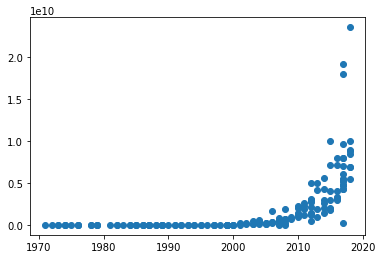

In [4]:
plt.scatter(X,Y);

In [5]:
Y = log_scale(Y)

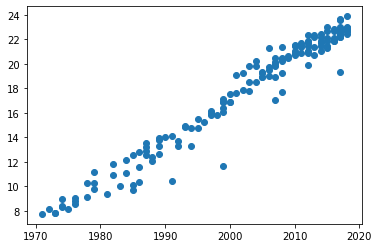

In [6]:
plt.scatter(X,Y);

In [7]:
X,Y,mx,my,sx,sy = normalizer(X,Y,cast=True,normal=True)

In [8]:
# units will be unimportant

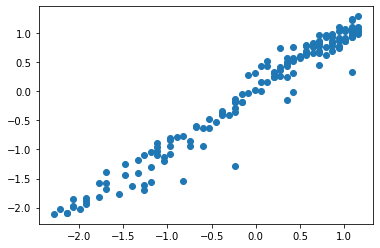

In [9]:
plt.scatter(X,Y);

In [10]:
# model, losses = create_model(X,Y,100,lr=0.0000001) # if not normalized
model, losses = create_model(X,Y,100)

epoch 1/100, Loss: 0.2214
epoch 2/100, Loss: 0.2141
epoch 3/100, Loss: 0.2023
epoch 4/100, Loss: 0.1879
epoch 5/100, Loss: 0.1726
epoch 6/100, Loss: 0.1572
epoch 7/100, Loss: 0.1425
epoch 8/100, Loss: 0.1289
epoch 9/100, Loss: 0.1165
epoch 10/100, Loss: 0.1055
epoch 11/100, Loss: 0.0957
epoch 12/100, Loss: 0.0872
epoch 13/100, Loss: 0.0799
epoch 14/100, Loss: 0.0735
epoch 15/100, Loss: 0.0681
epoch 16/100, Loss: 0.0635
epoch 17/100, Loss: 0.0596
epoch 18/100, Loss: 0.0562
epoch 19/100, Loss: 0.0534
epoch 20/100, Loss: 0.0510
epoch 21/100, Loss: 0.0490
epoch 22/100, Loss: 0.0473
epoch 23/100, Loss: 0.0459
epoch 24/100, Loss: 0.0447
epoch 25/100, Loss: 0.0437
epoch 26/100, Loss: 0.0428
epoch 27/100, Loss: 0.0421
epoch 28/100, Loss: 0.0415
epoch 29/100, Loss: 0.0410
epoch 30/100, Loss: 0.0406
epoch 31/100, Loss: 0.0403
epoch 32/100, Loss: 0.0400
epoch 33/100, Loss: 0.0397
epoch 34/100, Loss: 0.0395
epoch 35/100, Loss: 0.0394
epoch 36/100, Loss: 0.0392
epoch 37/100, Loss: 0.0391
epoch 38/1

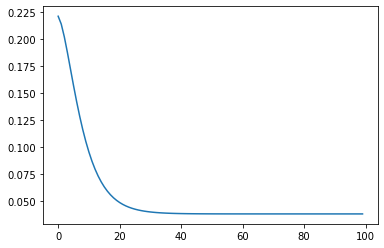

In [11]:
plt.plot(losses);

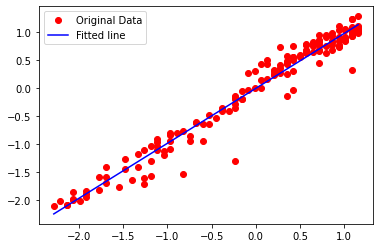

In [12]:
predicted = plot_line_data(model,X,Y)

In [13]:
params = print_model_parameters(model,1)

In [14]:
params

[array([[0.98048896]], dtype=float32), array([-1.5894268e-05], dtype=float32)]

### Inverse transform of data

In [15]:
# a = w * (Sy/Sx)

In [16]:
a = params[0][0,0] * sy/sx

In [17]:
a

0.3416538560511331

### Exponential Growth Model

In [18]:
# n* time = log(n) / a
double_time = np.log(2)/a
print(double_time)

2.028799524089687
